In [15]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


In [16]:
# 示例图片路径
image_path = "../datasets/tennis.png"  # 替换为实际图片路径
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 默认读取为 BGR 格式，需转为 RGB


image 1/1 d:\Learning\AILab\cv\yolo\..\datasets\tennis.png: 416x640 1 person, 1 sports ball, 1 tennis racket, 27.2ms
Speed: 1.0ms preprocess, 27.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


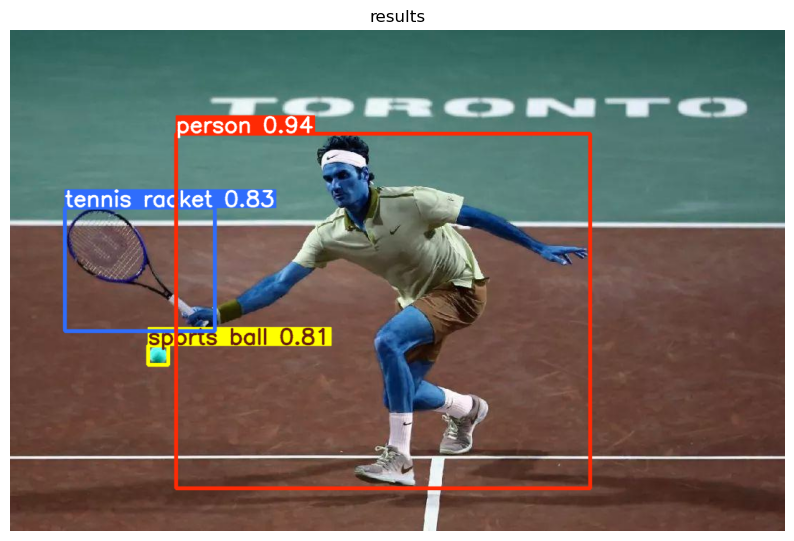

In [28]:
# 加载 YOLO 模型
model = YOLO("yolov8n.pt")

# 推理
results = model("../datasets/tennis.png")

plt.figure(figsize=(10, 8))
plt.imshow(results[0].plot())
plt.axis("off")
plt.title("results")
plt.show()

# results[0].show()

In [18]:

# 获取预测框的坐标
boxes = results[0].boxes.xyxy.cpu().numpy()  # (x_min, y_min, x_max, y_max)

# 绘制预测的 RoI
for box in boxes:
    x_min, y_min, x_max, y_max = map(int, box[:4])  # 转为整数
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)

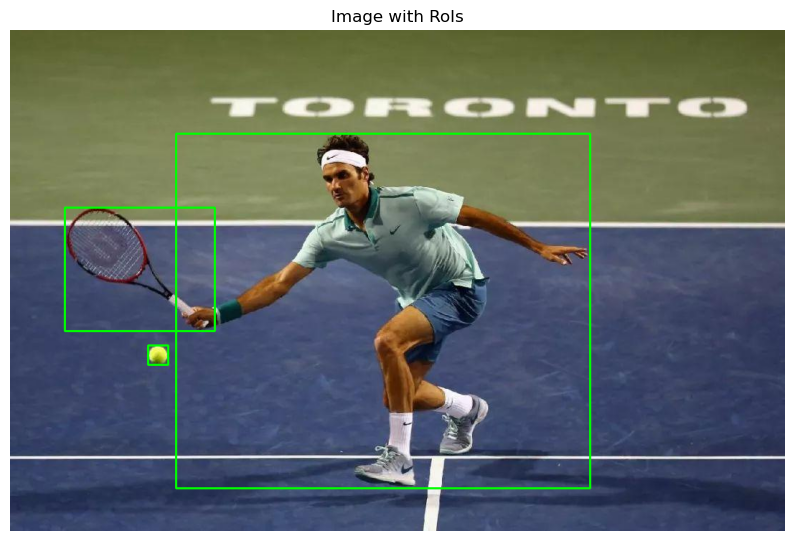

In [19]:
# 显示带有 RoI 的图片
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Image with RoIs")
plt.show()